# Lab 2 Practice: Examining Numerical Data

## Objectives
The objectives of this tutorial/lab are to introduce the analysis of numerical (quantitative) variables. This includes numerical summaries of a single numerical variable and graphical summaries of a single numerical variable. It also includes exploration of the relationship between categorical and numerical variables, and of the relationship between two numerical variables.

## Tools: 

In [1]:
source("http://www.openintro.org/stat/data/cdc.R")

The `source` function is used to import the dataset that will be used in the tutorial. The data that is available to you is called `cdc`.

## Data Information:

### Data Set:

Today we will be using data from the CDC, the Centres for Disease Control in the U.S..

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The BRFSS Web site (http://www.cdc.gov/brfss) contains a complete description of the survey, including the research questions that motivate the study and many interesting results derived from the data.

We will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

 
#### Name: #### 
* `cdc` - health data from the sample of the BRFSS survey from 2000.

#### Variables: ####
* `genhlth` - respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor
* `exerany` - whether the respondent exercised in the past month (recent) or did not (not_recent).
* `hlthplan` - whether the respondent had some form of health coverage (insured) or did not (uninsured).
* `smoke100` - whether the respondent had smoked at least 100 cigarettes in her lifetime (smoker) or has not (nonsmoker).
* `height` - the respondent's height measured in inches.
* `weight` - the respondent's weight measured in pounds.
* `wtdesire` - the respondent's desired weight measured in pounds.
* `age` - the respondent's age measured in years.
* `gender` - whether the respondent said they were female or male.

## Getting Started: How R thinks about data

R stores data in data frames (or dataset), which you might think of as a type of spreadsheet. **Each row is a different observation** (a different subject, or case) and **each column is a different variable** (the first is `genhlth`, the second `exerany` and so on). 

To view the names of the variables in the `cdc` data frame, use the `names` function.

In [2]:
names(cdc)

[1] "genhlth"  "exerany"  "hlthplan" "smoke100" "height"   "weight"   "wtdesire"
[8] "age"      "gender"

The function will return a list of the column names in the `cdc` data frame, which corresponds to the list of variables recorded for each subject.

We can see the size of the data frame, number of subjects and number of variables, by using the `dim` function

In [3]:
dim(cdc)

[1] 20000     9

which will return the number of rows and columns. We can see that the `cdc` data frame contains 9 variables recorded on 20,000 subjects.

We can look at the first few entries (rows) of our data with the `head` function

In [4]:
head(cdc)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
1,good,0,1,0,70,175,175,77,m
2,good,0,1,1,64,125,115,33,f
3,good,1,1,1,60,105,105,49,f
4,good,1,1,0,66,132,124,42,f
5,very good,0,1,0,61,150,130,55,f
6,very good,1,1,0,64,114,114,55,f


and similarly we can look at the last few entries (rows) of our data with the `tail` function

In [5]:
tail(cdc)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
19995,good,0,1,1,69,224,224,73,m
19996,good,1,1,0,66,215,140,23,f
19997,excellent,0,1,0,73,200,185,35,m
19998,poor,0,1,0,65,216,150,57,f
19999,good,1,1,0,67,165,165,81,f
20000,good,1,1,1,69,170,165,83,m


In addition to showing some of the values recorded for each variable, the `head` and `tail` functions provide information on how each variable is being treated by R. For example, at the top of the `genhlth` column, you will see the label `<fct>`. This indicates that `genhlth` is being treated as a **`Factor` variable** which is equivalent to a **categorical variable**. Similarly, `gender` is being treated as a `Factor`, or categorical variable. 

The other variables are all being treated as numerical variables. Those labeled **`<dbl>`** are formally treated as **continuous numerical variables**, while those labeled **`<int>`** are formally treated as **discrete numerical variables**.

Note, that when we begin exploring the data frame, there may be variables that are not treated by R in the correct manner. For example, the variable `hlthplan` records whether the respondent has some sort of health coverage. This is clearly a categorical variable. However, it was recorded either a `0` for those without coverage, or `1` for those with health coverage. Initially, upon encountering a series of `0`s and `1`s, R treats the variable as numerical.

The variable type can be changed in R if it is incorrect. We will discuss that later.

You could also look at all of the data frame at once by typing its name, `cdc`,  into a code cell, but that might be unwise here. We know `cdc` has 20,000 rows, so viewing the entire data set could be overwhelming. Better to observe smaller portions of the dataframe using `head`, `tail`, or subsetting techniques that will be discussed at a later time.

### Selecting variables within a data frame

There are many ways to select a subset of a data frame. 

At the moment, we will focus on selecting data associated with a particular variable in our data frame. We can use any of the variable names to select items in our data set.

For example `cdc$weight`, represents the data associated with the variable `weight` in the `cdc` data frame.  The dollar-sign, `$`, tells R to look in data frame `cdc` for the column called `weight`. If one wanted to view some of the `weight` data, one could use the `head` function, or `tail` function as before.

In [6]:
head(cdc$weight)

[1] 175 125 105 132 150 114

This returns the `weight` value for each of first six subjects in the `cdc` data frame.

### Summarizing Quantitative Data

### Numerical Summaries

The BRFSS questionnaire contains a massive amount of information. A good first step in any analysis is to reduce all of that information into a few summary statistics and graphics. As a simple example, the function `summary` returns a numerical summary: minimum, first quartile, median, mean, second quartile, and maximum. For `weight`, this is

In [7]:
summary(cdc$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   68.0   140.0   165.0   169.7   190.0   500.0 

The mean, or average, weight in our sample is 169.7 pounds. The median weight is 165 pounds, indicating that half of the respondents weighed less than 165 pounds and half of the respondents weighed more than 165 pounds. Minimum weight recorded was 68 pounds, while max weight recorded was 500 pounds. One quarter of respondents weighed less than 140 pounds and one quarter of respondents weighed more than 190 pounds.

R also has built-in functions to compute summary statistics one by one. For instance, to calculate the **mean**, **median**, **variance**, and **standard deviation** of `weight`, type

In [8]:
mean(cdc$weight) 

[1] 169.683

In [9]:
median(cdc$weight)

[1] 165

In [10]:
var(cdc$weight)

[1] 1606.484

In [11]:
sd(cdc$weight)

[1] 40.08097

### Question: Find the median `height` for all respondents in the sample.

### Graphical Summaries

Two common ways to visualize a single numerical variable are with **box plots** (`boxplot`) and **histograms** (`hist`). 

#### Histogram

We can look at the histogram, `hist`, for the variable `weight` with the command

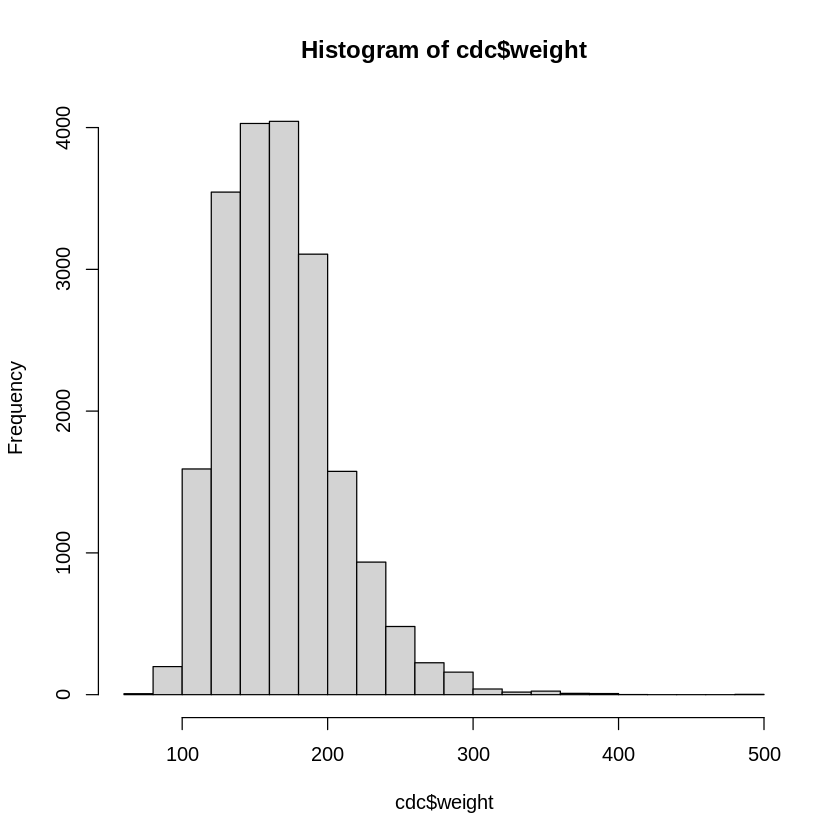

In [12]:
hist(cdc$weight)

Histograms are generally a very good way to see the shape of a single distribution, but the shape may be affected by how the data is split between the different bins. If you wish, you can control the number of bins by adding a `breaks` argument to the `hist` function. For example, to make a histogram of `weight` with 50 breaks

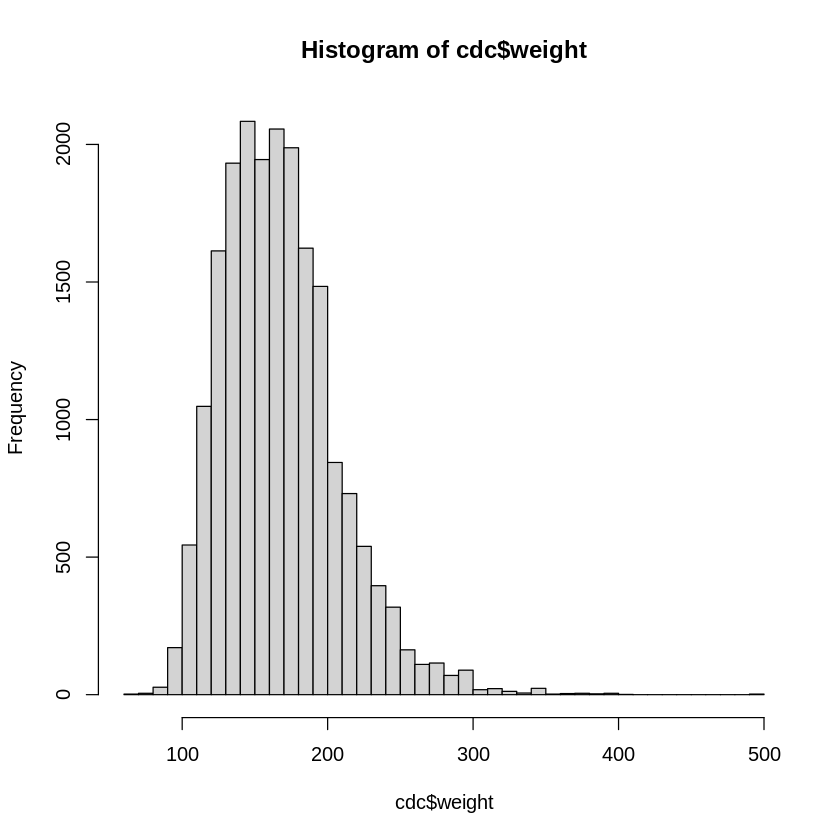

In [13]:
hist(cdc$weight, breaks = 50)

To make a histogram of `weight` with 5 breaks

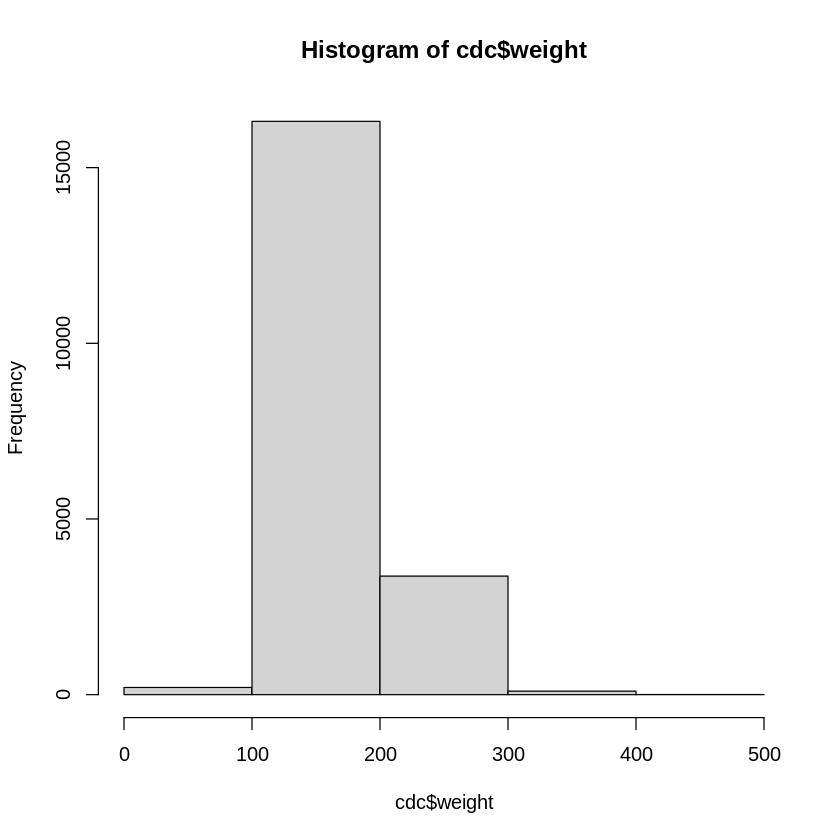

In [14]:
hist(cdc$weight, breaks = 5)

All of the graphing functions in R may be used by including just the data to be graphed, but there are some optional arguments that may be used to customize the plot. Some of these optional arguments include:
* `xlab` - specify the label for the x-axis, eg `xlab = "x-axis label"`
* `xlim` - specify the minimum and maximum value for the x-axis, eg `xlim=c(minimum, maximum)`
* `ylab` - specify the label for the y-axis, eg `ylab = "y-axis label"`
* `ylim` - specify the minimum and maximum value for the y-axis, eg `ylim=c(minimum, maximum)`
* `main` - specify a main title for the graph, eg `main = "Reported Weight of Respondents"`

Not all of these options will be relevant in each situation. There are also more optional arguments that we will explore in coming weeks.

We can add **Weight in lbs** as a label for the x-axis and **Self-reported weight of Respondents** as a title for the histogram by customizing the `hist` function. 

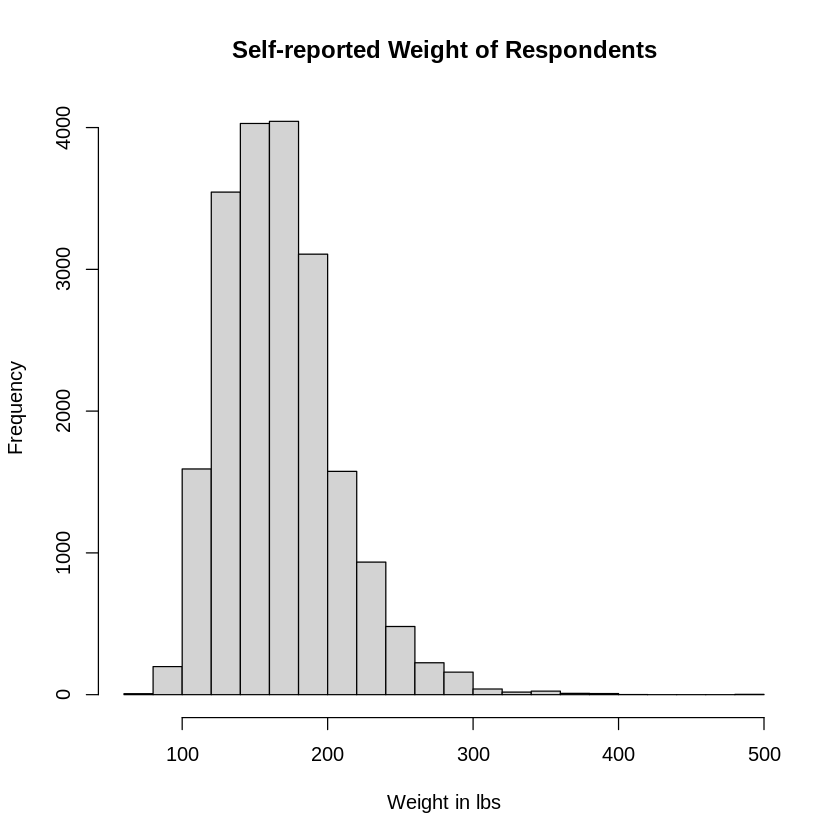

In [15]:
hist(cdc$weight, xlab = "Weight in lbs", main = "Self-reported Weight of Respondents")

Weight appears to be slightly right skewed, with most reported weights between about 120 pounds and 220 pounds and almost all weights between 100 pounds and 300 pounds. There appears to be some unusual observations around 500 pounds. 

Producing relative frequency histograms in R requires using a separate R package. For now we will just use frequency histograms. 

### Question: Construct a histogram for the `height` of the individuals surveyed.

### Question: Does the distribution of height appear to be skewed left, skewed right, or symmetric? Is it bell shaped?

### Answer

#### Boxplot

We can construct a box plot for a single variable with the following command.

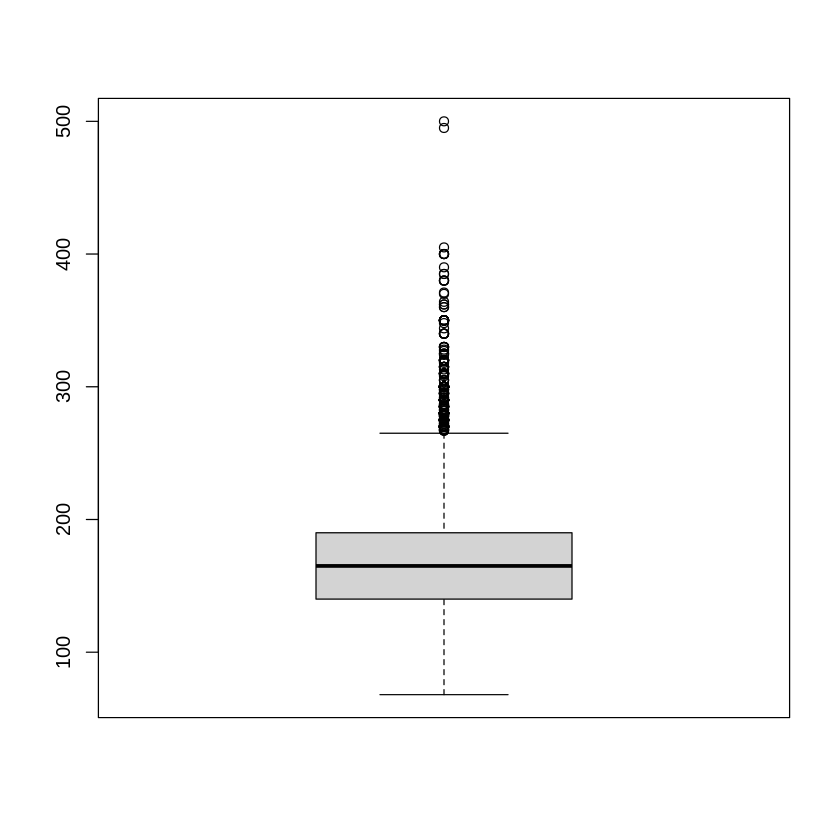

In [16]:
boxplot(cdc$weight)

As before, the boxplot may be customized by adding axis labels and titles as appropriate. 

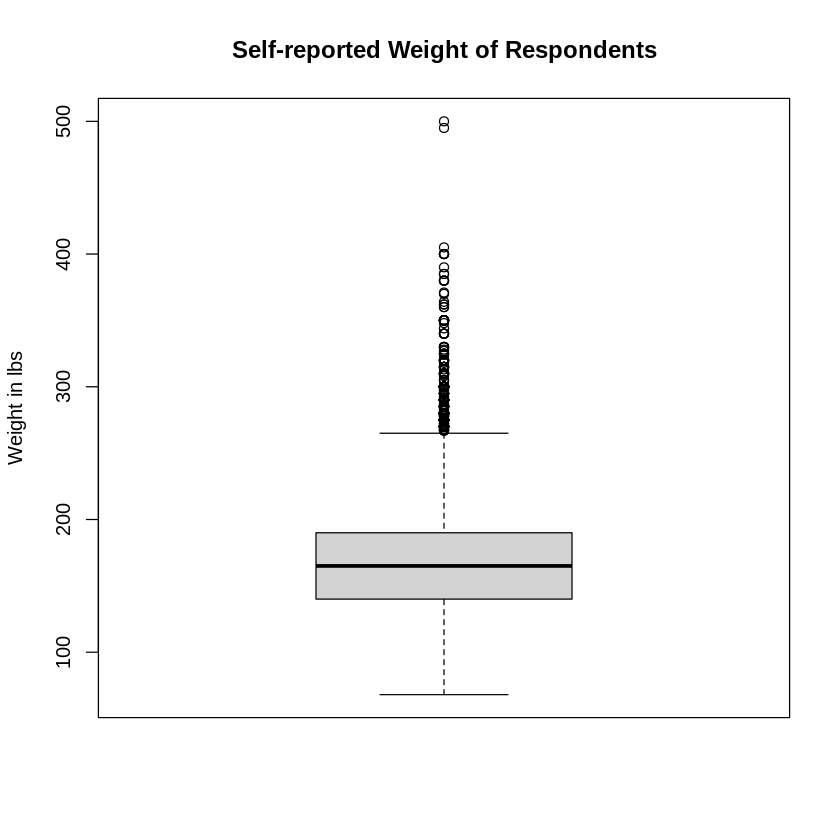

In [17]:
boxplot(cdc$weight, ylab = "Weight in lbs", main = "Self-reported Weight of Respondents")

Recall that the `summary` function will identify the locations of the components of the box.

In [18]:
summary(cdc$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   68.0   140.0   165.0   169.7   190.0   500.0 

### Question: Construct a boxplot for the `height` of the individuals surveyed.

### Exploring relationships between variables 

The `plot` function is useful for exploring the relationship between variable. The `plot` function will select which graphical display to use based upon the variables being compared.

### Relationship between categorical and numerical variables 

#### Side-by-side boxplots

Boxplots are also useful for comparing distribution of a quantitative variable across different groups. At present, our data frame contains only two variables that are being treated as categorical, `genhlth` and `gender`. To explore the relationship between `weight` and `genhlth`, one can use the `plot` function, while identifying an explanatory variable and response variable.

When comparing categorical and numerical variables in R, one should treat the **categorical variable** as the **explanatory variable**, or **x-variable**, and the **numerical variable** as the **response variable**, or **y-variable**. This is not to suggest the true nature of the relationship, but instead to obtain suitable graphs.

There are two ways to do this using the `plot` function.

One way is to use `x = ` and `y = ` to identify the explanatory variable and response variable. 

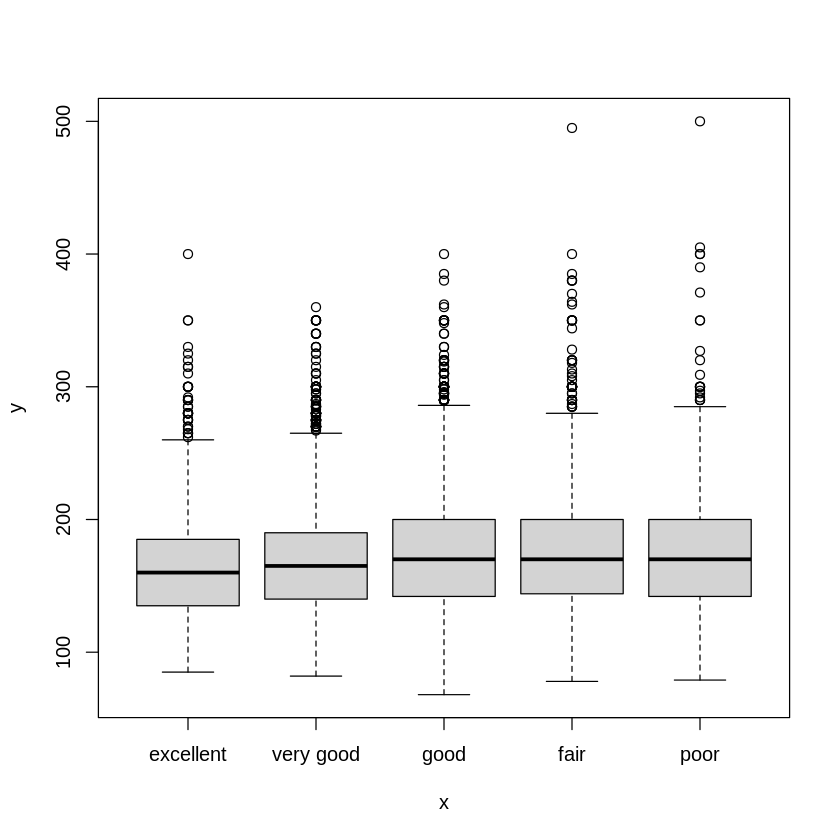

In [19]:
plot(x = cdc$genhlth, y = cdc$weight)

Alternatively, one may use `y~x` notation to state the relationship between the two variables of interest. This notation, called y tilde x, means that y depends upon x, or y responds to the explanatory variable x. For example, 

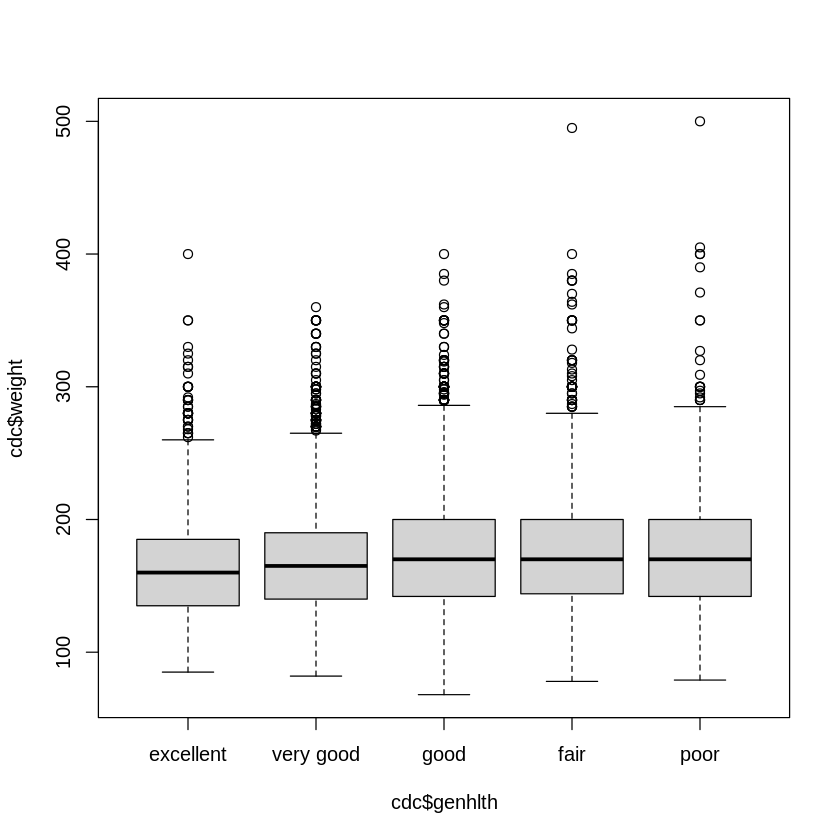

In [20]:
plot(cdc$weight ~ cdc$genhlth)

As before, the plot may be customized by adding titles as appropriate. In this example, **General Health** describes the variable on the x-axis, **Weight in lbs** describes the variable on the y-axis, and the overall graph is displaying the **Relationship between general health and weight**.

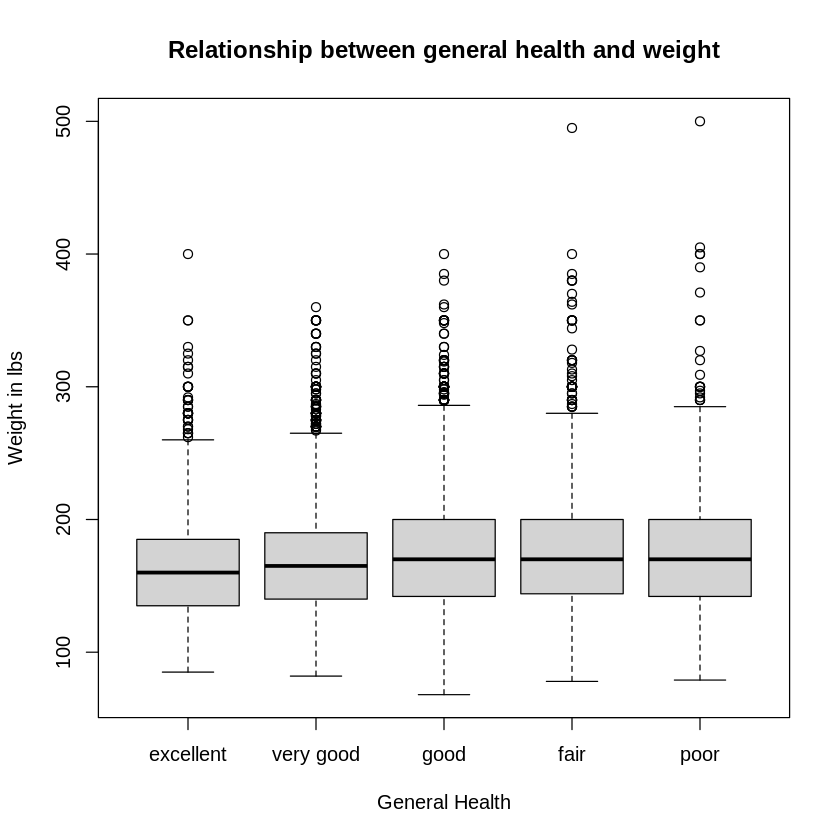

In [21]:
plot(cdc$weight~cdc$genhlth, xlab = "General Health", ylab = "Weight in lbs", main = "Relationship between general health and weight")

It does appear that there may be a relationship between general health of respondents and the weight of respondents. As reported health goes from excellent to poor, weight tends to increase as indicated by increases in the median weight.

### Question: Construct a plot to explore the relationship between `height` and `genhlth` of the individuals surveyed.

### Relationship between two and numerical variables 

#### Scatterplots

**Scatterplots** are useful for exploring the **relationship** between **two numerical variables**. For example, to explore the relationship between `weight` and `height`, one can use the `plot` function, while identifying an explanatory variable and response variable.

There are two ways to do this using the `plot` function.

One way is to use `x = ` and `y = ` to identify the explanatory variable and response variable. 

When comparing two numerical variables in R, one can treat either variable as the explanatory variable and response variable.

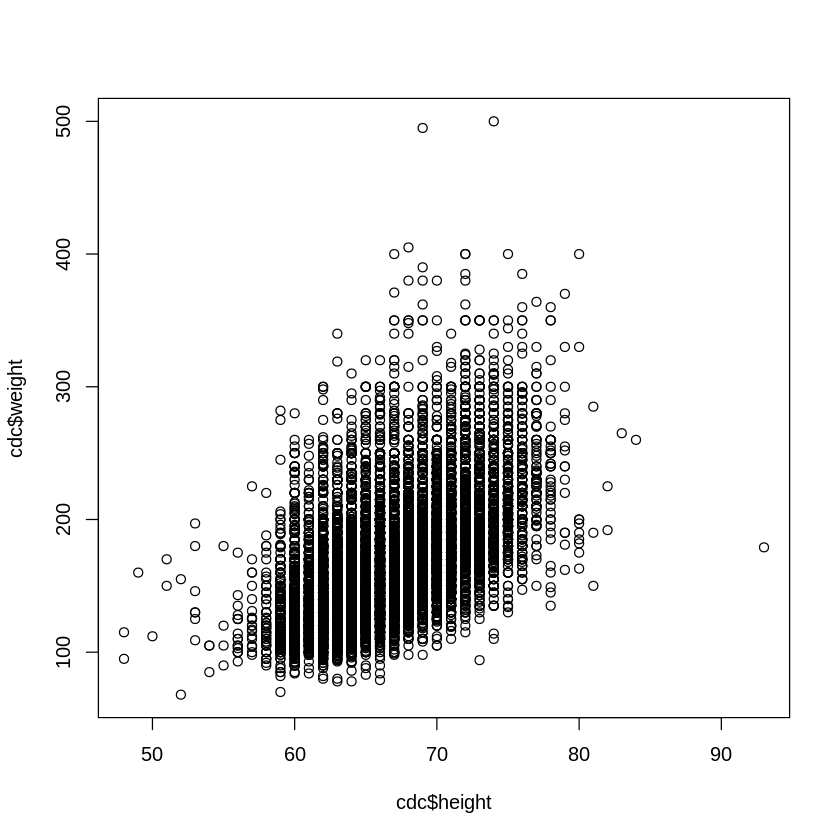

In [22]:
plot(x = cdc$height, y = cdc$weight)

As before, the plot may be customized by adding titles as appropriate. 

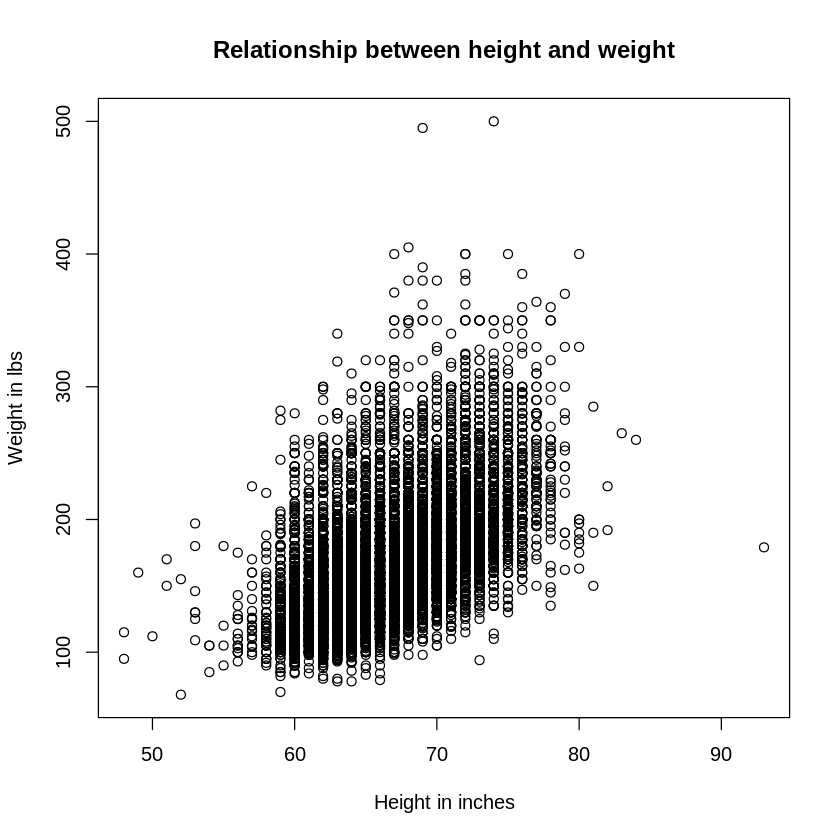

In [23]:
plot(cdc$weight~cdc$height, xlab = "Height in inches", ylab = "Weight in lbs", main = "Relationship between height and weight")

Alternatively, one may use `y~x` notation to state the relationship between the two variables of interest. For example

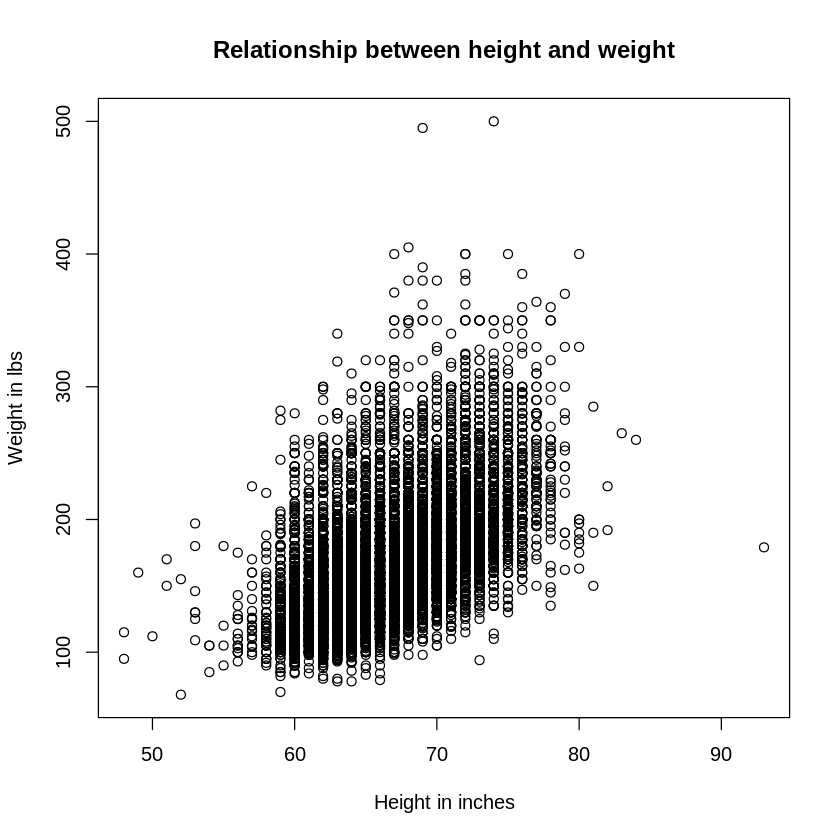

In [24]:
plot(cdc$weight ~ cdc$height, xlab = "Height in inches", ylab = "Weight in lbs", main = "Relationship between height and weight")

There does appear to be a relationship between `height` and `weight`. In particular, there is a positive, linear relationship, but the relationship seems weak. As height increases, weight also tends to increase and it does so in a roughly linear fashion. However, there is quite a bit of variability around this overall trend, indicating a weak relationship.

### Question: Construct a plot to explore the relationship between `weight` and `age` of the individuals surveyed.